In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Define some VoT values
vot = min(np.random.lognormal(mean=-0.1116, sigma=0.4724), 4)
vots = [min(np.random.lognormal(mean=-0.1116, sigma=0.4724), 4) for i in range(100000)]

In [3]:
default_value_of_times = {
    "car": 10.42,
    "bike": 10.39,
    "transit": 7.12,
}
car_vot = default_value_of_times["car"]

vots_per_mode = {}
for mode, vot in default_value_of_times.items():
    vots_mode = [vot * value for value in vots]
    vots_per_mode[mode] = vots_mode

av_vot_factors = [1.0, 0.5, 0.25]
vots_avs = {}
for factor in av_vot_factors:
    vots_av = [car_vot * factor * value for value in vots]
    vots_avs[f"{factor}"] = vots_av

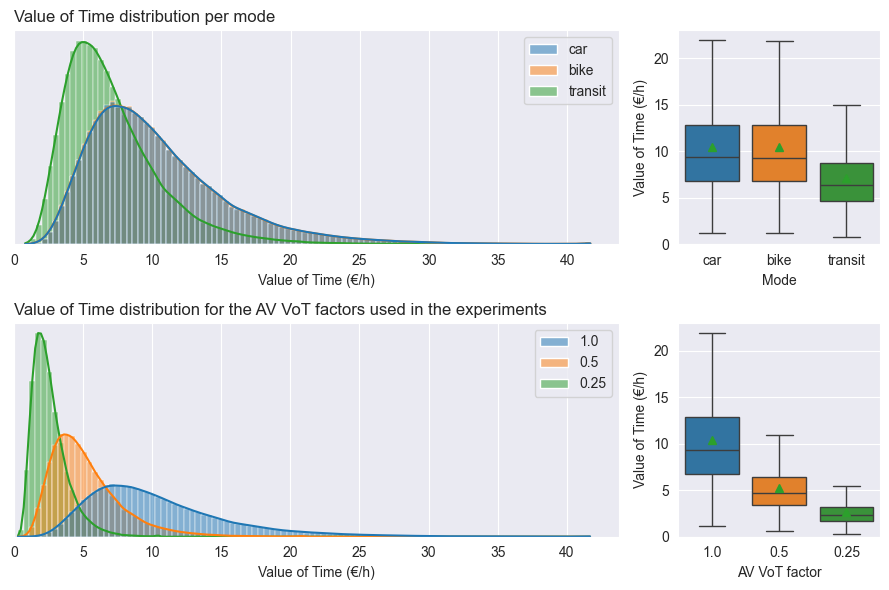

In [4]:
# Set the ratio 4:1:4:1
fig, axes = plt.subplots(2, 2, figsize=(9, 6), gridspec_kw={"width_ratios": [3, 1]})
axes = axes.flatten()
vot_label = "Value of Time (€/h)"

sns.histplot(vots_per_mode, ax=axes[0], kde=True, bins=100)
sns.boxplot(vots_per_mode, ax=axes[1], showmeans=True, showfliers=False)
sns.histplot(vots_avs, ax=axes[2], kde=True, bins=100)
sns.boxplot(vots_avs, ax=axes[3], showmeans=True, showfliers=False)

axes[0].set_title("Value of Time distribution per mode", loc="left")
axes[2].set_title("Value of Time distribution for the AV VoT factors used in the experiments", loc="left")

axes[0].set_xlabel(vot_label)
axes[1].set_ylabel(vot_label)
axes[1].set_xlabel("Mode")
axes[2].set_xlabel(vot_label)
axes[3].set_ylabel(vot_label)
axes[3].set_xlabel("AV VoT factor")

# Remove the y-axis ticks and labels of the histplots
axes[0].set_yticks([])
axes[2].set_yticks([])
axes[0].set_ylabel(None)
axes[2].set_ylabel(None)

# Set the x-axis limits
axes[0].set_xlim(0)
axes[1].set_ylim(0)
axes[2].set_xlim(0)
axes[3].set_ylim(0)

# Tight layout and save
plt.tight_layout()
plt.savefig("../img/vot_distribution.svg", dpi=300)